### Verify Image and Text Duplicated

In [9]:
import pandas as pd
import os

# Dataset root (adjust if needed)
DATASET_ROOT = '/gpfs/workdir/restrepoda/datasets/'

# Dataset configurations
DATASET_CONFIGS = {
    'daquar': {'path': 'daquar', 'image_col': 'image_id', 'text_col': 'question', 'image_dir': 'images'},
    'coco-qa': {'path': 'coco-qa', 'image_col': 'image_id', 'text_col': 'questions', 'image_dir': 'images'},
    'fakeddit': {'path': 'fakeddit', 'image_col': 'id', 'text_col': 'text', 'image_dir': 'images'},
    'Recipes5k': {'path': 'Recipes5k', 'image_col': 'image', 'text_col': 'ingredients', 'image_dir': 'images'},
    'brset': {'path': 'BRSET/brset', 'image_col': 'image_id', 'text_col': 'text', 'image_dir': 'images'},
    'ham10000': {'path': 'HAM10000', 'image_col': 'image_id', 'text_col': 'text', 'image_dir': 'images'},
    'mimic': {'path': 'MIMIC/mimic', 'image_col': 'path_preproc', 'text_col': 'text', 'image_dir': '.'},
    'mbrset': {'path': 'mBRSET/mbrset', 'image_col': 'file', 'text_col': 'text', 'image_dir': 'images'},
}

# List of datasets to check
DATASETS_TO_CHECK = list(DATASET_CONFIGS.keys())

for dataset_name in DATASETS_TO_CHECK:
    config = DATASET_CONFIGS[dataset_name]
    dataset_path = os.path.join(DATASET_ROOT, config['path'])
    labels_path = os.path.join(dataset_path, 'labels.csv')
    
    if not os.path.exists(labels_path):
        print(f"{dataset_name}: labels.csv not found at {labels_path}")
        continue
    
    df = pd.read_csv(labels_path)
    image_col = config['image_col']
    text_col = config["text_col"]
    
    if image_col not in df.columns:
        print(f"{dataset_name}: Column '{image_col}' not found in labels.csv")
        continue
    
    duplicates = df[df.duplicated(subset=[image_col], keep=False)]
    num_duplicates = len(duplicates)
    
    if num_duplicates > 0:
        print(f"{dataset_name}: {num_duplicates} duplicated entries in '{image_col}' from {len(df)} rows")
        # Optionally, show some examples
        print(duplicates[image_col].value_counts().head())
    else:
        print(f"{dataset_name}: No duplicates in '{image_col}'")



    if text_col not in df.columns:
        print(f"{dataset_name}: Column '{text_col}' not found in labels.csv")
        continue
    
    duplicates = df[df.duplicated(subset=[image_col, text_col], keep=False)]
    num_duplicates = len(duplicates)
    
    if num_duplicates > 0:
        print(f"{dataset_name}: {num_duplicates} duplicated entries in '{image_col}' and '{text_col}' from {len(df)} rows")
        # Optionally, show some examples
        print(duplicates[image_col].value_counts().head())
    else:
        print(f"{dataset_name}: No duplicates in '{image_col}' and '{text_col}'")


daquar: 12154 duplicated entries in 'image_id' from 12163 rows
image_id
image8     30
image6     23
image9     22
image7     22
image50    21
Name: count, dtype: int64
daquar: No duplicates in 'image_id' and 'question'
coco-qa: 77742 duplicated entries in 'image_id' from 116238 rows
image_id
441972    12
273352    10
102589     9
32286      9
148002     9
Name: count, dtype: int64
coco-qa: No duplicates in 'image_id' and 'questions'
fakeddit: No duplicates in 'id'
fakeddit: No duplicates in 'id' and 'text'
Recipes5k: No duplicates in 'image'
Recipes5k: No duplicates in 'image' and 'ingredients'
brset: No duplicates in 'image_id'
brset: No duplicates in 'image_id' and 'text'
ham10000: No duplicates in 'image_id'
ham10000: No duplicates in 'image_id' and 'text'
mimic: No duplicates in 'path_preproc'
mimic: No duplicates in 'path_preproc' and 'text'
mbrset: No duplicates in 'file'
mbrset: No duplicates in 'file' and 'text'


#### Fix Image and Text Duplicated

In [1]:
import pandas as pd
import os
import shutil

# Dataset root (adjust if needed)
DATASET_ROOT = "/gpfs/workdir/restrepoda/datasets/"

# Dataset configurations
DATASET_CONFIGS = {
    "daquar": {"path": "daquar", "image_col": "image_id", "text_col": "question", "image_dir": "images"},
    "coco-qa": {"path": "coco-qa", "image_col": "image_id", "text_col": "questions", "image_dir": "images"},
    "fakeddit": {"path": "fakeddit", "image_col": "id", "text_col": "text", "image_dir": "images"},
    "Recipes5k": {"path": "Recipes5k", "image_col": "image", "text_col": "ingredients", "image_dir": "images"},
    "brset": {"path": "BRSET/brset", "image_col": "image_id", "text_col": "text", "image_dir": "images"},
    "ham10000": {"path": "HAM10000", "image_col": "image_id", "text_col": "text", "image_dir": "images"},
    "mimic": {"path": "MIMIC/mimic", "image_col": "path_preproc", "text_col": "text", "image_dir": "."},
    "mbrset": {"path": "mBRSET/mbrset", "image_col": "file", "text_col": "text", "image_dir": "images"},
}

# List of datasets to check
DATASETS_TO_CHECK = list(DATASET_CONFIGS.keys())

print("\n==============================")
print(" Dropping Image+Text Duplicates")
print("==============================\n")

for dataset_name in DATASETS_TO_CHECK:
    config = DATASET_CONFIGS[dataset_name]
    dataset_path = os.path.join(DATASET_ROOT, config["path"])
    labels_path = os.path.join(dataset_path, "labels.csv")
    legacy_path = os.path.join(dataset_path, "labels_legacy.csv")

    if not os.path.exists(labels_path):
        print(f"{dataset_name}: ❌ labels.csv not found at {labels_path}")
        continue

    df = pd.read_csv(labels_path)

    image_col = config["image_col"]
    text_col = config["text_col"]

    if image_col not in df.columns or text_col not in df.columns:
        print(f"{dataset_name}: ❌ Missing required columns: {image_col}, {text_col}")
        continue

    # Count duplicates (image + text together)
    dup_mask = df.duplicated(subset=[image_col, text_col], keep="first")
    num_dups = dup_mask.sum()

    if num_dups == 0:
        print(f"{dataset_name}: ✅ No image+text duplicates found ({len(df)} rows)")
        continue

    print(f"{dataset_name}: ⚠️ Found {num_dups} duplicated image+text rows")

    # Backup original file first
    if not os.path.exists(legacy_path):
        shutil.copy(labels_path, legacy_path)
        print(f"   ↳ Backup saved as labels_legacy.csv")
    else:
        print(f"   ↳ Backup already exists, skipping overwrite")

    # Drop duplicates
    df_clean = df.drop_duplicates(subset=[image_col, text_col], keep="first")

    # Save cleaned version back to labels.csv
    df_clean.to_csv(labels_path, index=False)

    print(f"   ↳ Cleaned labels.csv saved ({len(df_clean)} rows remaining)\n")

print("✅ Done cleaning all datasets.\n")



 Dropping Image+Text Duplicates

daquar: ✅ No image+text duplicates found (12163 rows)
coco-qa: ✅ No image+text duplicates found (116238 rows)
fakeddit: ✅ No image+text duplicates found (90992 rows)
Recipes5k: ✅ No image+text duplicates found (4826 rows)
brset: ✅ No image+text duplicates found (16266 rows)
ham10000: ✅ No image+text duplicates found (10015 rows)
mimic: ✅ No image+text duplicates found (153128 rows)
mbrset: ✅ No image+text duplicates found (4884 rows)
✅ Done cleaning all datasets.



### Verify Rows in original labels.csv vs Embedding generated csvs

In [2]:
import pandas as pd
import os

# Dataset root
DATASET_ROOT = '/gpfs/workdir/restrepoda/datasets/'

# Embedding paths and files
EMBEDDINGS_PATHS = "/gpfs/workdir/restrepoda/Embeddings_vlm/Recipes5k/ /gpfs/workdir/restrepoda/Embeddings_vlm/daquar/ /gpfs/workdir/restrepoda/Embeddings_vlm/coco-qa/ /gpfs/workdir/restrepoda/Embeddings_vlm/fakeddit/ /gpfs/workdir/restrepoda/Embeddings_vlm/brset/ /gpfs/workdir/restrepoda/Embeddings_vlm/ham10000/ /gpfs/workdir/restrepoda/Embeddings_vlm/mimic/ /gpfs/workdir/restrepoda/Embeddings_vlm/mbrset/"
FILES = "embeddings_biomedclip.csv embeddings_clip.csv embeddings_medsiglip.csv embeddings_siglip.csv"

# Dataset configurations
DATASET_CONFIGS = {
    'daquar': {'path': 'daquar', 'image_col': 'image_id', 'text_col': 'question', 'image_dir': 'images'},
    'coco-qa': {'path': 'coco-qa', 'image_col': 'image_id', 'text_col': 'questions', 'image_dir': 'images'},
    'fakeddit': {'path': 'fakeddit', 'image_col': 'id', 'text_col': 'text', 'image_dir': 'images'},
    'Recipes5k': {'path': 'Recipes5k', 'image_col': 'image', 'text_col': 'ingredients', 'image_dir': 'images'},
    'brset': {'path': 'BRSET/brset', 'image_col': 'image_id', 'text_col': 'text', 'image_dir': 'images'},
    'ham10000': {'path': 'HAM10000', 'image_col': 'image_id', 'text_col': 'text', 'image_dir': 'images'},
    'mimic': {'path': 'MIMIC/mimic', 'image_col': 'path_preproc', 'text_col': 'text', 'image_dir': '.'},
    'mbrset': {'path': 'mBRSET/mbrset', 'image_col': 'file', 'text_col': 'text', 'image_dir': 'images'},
}

embedding_paths_list = EMBEDDINGS_PATHS.split()
files_list = FILES.split()

for embedding_path in embedding_paths_list:
    dataset_name = os.path.basename(embedding_path.rstrip('/'))
    if dataset_name not in DATASET_CONFIGS:
        print(f"Dataset {dataset_name} not in configs, skipping")
        continue
    
    config = DATASET_CONFIGS[dataset_name]
    image_col = config['image_col']
    
    # Load labels.csv
    dataset_path = os.path.join(DATASET_ROOT, config['path'])
    labels_path = os.path.join(dataset_path, 'labels.csv')
    if not os.path.exists(labels_path):
        print(f"{dataset_name}: labels.csv not found")
        continue
    df_labels = pd.read_csv(labels_path)
    labels_rows = len(df_labels)
    print(f"{dataset_name}: labels.csv has {labels_rows} rows")
    
    for file in files_list:
        emb_file_path = os.path.join(embedding_path, file)
        if not os.path.exists(emb_file_path):
            print(f"{dataset_name}: {file} not found")
            continue
        df_emb = pd.read_csv(emb_file_path)
        emb_rows = len(df_emb)
        print(f"  {file}: {emb_rows} rows")
        
        if emb_rows != labels_rows:
            # Check for duplicates in image_col
            duplicates = df_emb[df_emb.duplicated(subset=[image_col], keep=False)]
            num_dup = len(duplicates)
            if num_dup > 0:
                print(f"    WARNING: {num_dup} duplicated entries in '{image_col}' in {file}")
            else:
                print(f"    No duplicates in '{image_col}', but row count mismatch")
        else:
            print(f"    Row count matches")

Recipes5k: labels.csv has 4826 rows
  embeddings_biomedclip.csv: 4826 rows
    Row count matches
  embeddings_clip.csv: 4826 rows
    Row count matches
  embeddings_medsiglip.csv: 4826 rows
    Row count matches
  embeddings_siglip.csv: 4826 rows
    Row count matches
daquar: labels.csv has 12163 rows
  embeddings_biomedclip.csv: 12164 rows
  embeddings_clip.csv: 12164 rows
  embeddings_medsiglip.csv: 12164 rows
  embeddings_siglip.csv: 12164 rows
coco-qa: labels.csv has 116238 rows
  embeddings_biomedclip.csv: 116238 rows
    Row count matches
  embeddings_clip.csv: 116238 rows
    Row count matches
  embeddings_medsiglip.csv: 116238 rows
    Row count matches
  embeddings_siglip.csv: 116238 rows
    Row count matches
fakeddit: labels.csv has 90992 rows
  embeddings_biomedclip.csv: 90992 rows
    Row count matches
  embeddings_clip.csv: 90992 rows
    Row count matches
  embeddings_medsiglip.csv: 90992 rows
    Row count matches
  embeddings_siglip.csv: 90992 rows
    Row count matche

### Verify Rows in original labels.csv vs Embedding generated csvs

In [9]:
import pandas as pd
import os

# Dataset root
DATASET_ROOT = "/gpfs/workdir/restrepoda/datasets/"

# Embedding paths and files
EMBEDDINGS_PATHS = """
/gpfs/workdir/restrepoda/Embeddings_vlm/Recipes5k/
 /gpfs/workdir/restrepoda/Embeddings_vlm/daquar/
 /gpfs/workdir/restrepoda/Embeddings_vlm/coco-qa/
 /gpfs/workdir/restrepoda/Embeddings_vlm/fakeddit/
 /gpfs/workdir/restrepoda/Embeddings_vlm/brset/
 /gpfs/workdir/restrepoda/Embeddings_vlm/ham10000/
 /gpfs/workdir/restrepoda/Embeddings_vlm/mimic/
 /gpfs/workdir/restrepoda/Embeddings_vlm/mbrset/
"""

FILES = """
embeddings_biomedclip.csv
embeddings_clip.csv
embeddings_medsiglip.csv
embeddings_siglip.csv
"""

# Dataset configurations
DATASET_CONFIGS = {
    "daquar": {"path": "daquar", "image_col": "image_id", "text_col": "question"},
    "coco-qa": {"path": "coco-qa", "image_col": "image_id", "text_col": "questions"},
    "fakeddit": {"path": "fakeddit", "image_col": "id", "text_col": "text"},
    "Recipes5k": {"path": "Recipes5k", "image_col": "image", "text_col": "ingredients"},
    "brset": {"path": "BRSET/brset", "image_col": "image_id", "text_col": "text"},
    "ham10000": {"path": "HAM10000", "image_col": "image_id", "text_col": "text"},
    "mimic": {"path": "MIMIC/mimic", "image_col": "path_preproc", "text_col": "text"},
    "mbrset": {"path": "mBRSET/mbrset", "image_col": "file", "text_col": "text"},
}

embedding_paths_list = EMBEDDINGS_PATHS.split()
files_list = FILES.split()

print("\n==============================")
print(" Checking Embedding Duplicates")
print("==============================\n")

for embedding_path in embedding_paths_list:

    dataset_name = os.path.basename(embedding_path.rstrip("/"))

    if dataset_name not in DATASET_CONFIGS:
        print(f"Dataset {dataset_name} not in configs, skipping\n")
        continue

    config = DATASET_CONFIGS[dataset_name]
    image_col = config["image_col"]
    text_col = config["text_col"]

    # Load labels.csv
    dataset_path = os.path.join(DATASET_ROOT, config["path"])
    labels_path = os.path.join(dataset_path, "labels.csv")

    if not os.path.exists(labels_path):
        print(f"{dataset_name}: ❌ labels.csv not found\n")
        continue

    df_labels = pd.read_csv(labels_path)
    labels_rows = len(df_labels)

    print(f"\n📌 Dataset: {dataset_name}")
    print(f"labels.csv rows: {labels_rows}")

    # Check embedding files
    for file in files_list:

        emb_file_path = os.path.join(embedding_path, file)

        if not os.path.exists(emb_file_path):
            print(f"  {file}: ❌ not found")
            continue

        df_emb = pd.read_csv(emb_file_path)
        emb_rows = len(df_emb)

        print(f"\n  🔍 File: {file}")
        print(f"  embedding rows: {emb_rows}")

        # --- DUPLICATE CHECK (IMAGE + TEXT) ---
        dup_rows = df_emb[df_emb.duplicated(
            subset=[image_col, text_col],
            keep=False
        )]

        num_dup = len(dup_rows)

        if num_dup > 0:
            print(
                f"  ⚠️ Found {num_dup} duplicated rows in BOTH "
                f"'{image_col}' + '{text_col}'"
            )

            print("\n  Duplicate pairs (top 10):")
            print(
                dup_rows[[image_col, text_col]]
                .value_counts()
                .head(10)
            )

            print("\n  Example duplicated rows:")
            print(
                dup_rows[[image_col, text_col]]
                .head(8)
            )

        else:
            print(f"  ✅ No duplicates found in '{image_col}' + '{text_col}'")

        # Row mismatch warning
        if emb_rows != labels_rows:
            print("  ❗ Row count mismatch with labels.csv")
        else:
            print("  ✅ Row count matches labels.csv")



 Checking Embedding Duplicates


📌 Dataset: Recipes5k
labels.csv rows: 4826

  🔍 File: embeddings_biomedclip.csv
  embedding rows: 4826
  ✅ No duplicates found in 'image' + 'ingredients'
  ✅ Row count matches labels.csv

  🔍 File: embeddings_clip.csv
  embedding rows: 4826
  ✅ No duplicates found in 'image' + 'ingredients'
  ✅ Row count matches labels.csv

  🔍 File: embeddings_medsiglip.csv
  embedding rows: 4826
  ✅ No duplicates found in 'image' + 'ingredients'
  ✅ Row count matches labels.csv

  🔍 File: embeddings_siglip.csv
  embedding rows: 4826
  ✅ No duplicates found in 'image' + 'ingredients'
  ✅ Row count matches labels.csv

📌 Dataset: daquar
labels.csv rows: 12163

  🔍 File: embeddings_biomedclip.csv
  embedding rows: 12164
  ⚠️ Found 2 duplicated rows in BOTH 'image_id' + 'question'

  Duplicate pairs (top 10):
image_id                                                    question                                                                                              
/g

### Verify model training

In [81]:
%cd ..
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader

from src.data_utils import split_data, process_labels
from src.datasets import VQADataset
from utils import normalize_embeddings, modify_and_normalize_embeddings


# -----------------------------
# CONFIG (edit manually)
# -----------------------------
dataset = "brset"
backbone = "CLIP"

csv_path = "/gpfs/workdir/restrepoda/Embeddings_vlm/brset/embeddings_clip.csv"

label_column = "DR_2"   # ignored if dataset == mimic
is_multilabel = True

lambda_shift = 0.3
batch_size = 8
val_size = 0.1


# -----------------------------
# 1. LOAD DATA
# -----------------------------
print("Loading:", csv_path)
df = pd.read_csv(csv_path)

print("Initial shape:", df.shape)
print("Columns:", df.columns[:10])


# -----------------------------
# 2. DROP UNUSED COLUMNS
# -----------------------------
df = df.drop(columns=["image_id", "text"], errors="ignore")


# -----------------------------
# 3. FIND EMBEDDING COLUMNS
# -----------------------------
text_columns = [c for c in df.columns if "text_emb_" in c]
image_columns = [c for c in df.columns if "img_emb_" in c]

print("\nText embedding dims:", len(text_columns))
print("Image embedding dims:", len(image_columns))

assert len(text_columns) > 0, "No text embeddings found!"
assert len(image_columns) > 0, "No image embeddings found!"


# -----------------------------
# 4. NORMALIZE EMBEDDINGS
# -----------------------------
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

print("\nEmbeddings normalized.")


# -----------------------------
# 5. APPLY SHIFT (ONE VALUE ONLY)
# -----------------------------
text_emb = df[text_columns].values
img_emb  = df[image_columns].values

text_shifted, img_shifted = modify_and_normalize_embeddings(
    text_emb, img_emb, lambda_shift
)

df[text_columns] = text_shifted
df[image_columns] = img_shifted

print(f"Shift applied: lambda = {lambda_shift}")


# -----------------------------
# 6. SPLIT DATA
# -----------------------------
train_df, val_df, test_df = split_data(df, val_size=val_size)

print("\nSplit sizes:")
print("Train:", len(train_df))
print("Val:  ", len(val_df))
print("Test: ", len(test_df))


# -----------------------------
# 7. LABEL HANDLING
# -----------------------------
disease_cols = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion",
    "Pleural Other", "Pneumonia", "Pneumothorax"
]

#Atelectasis, Cardiomegaly, Consolidation, Edema, Pleural Effusion) + "No Finding"

current_label_col = disease_cols if dataset.lower() == "mimic" else label_column

train_labels, mlb, train_target_columns = process_labels(
    train_df, col=current_label_col
)

val_labels = process_labels(
    val_df, col=current_label_col,
    train_columns=train_target_columns,
    mlb=mlb
)

print("\nLabel tensor shape:", train_labels.shape)
print("Num classes:", train_labels.shape[1] if len(train_labels.shape) > 1 else 1)


# -----------------------------
# 8. BUILD DATASET + DATALOADER
# -----------------------------
train_dataset = VQADataset(
    train_df, text_columns, image_columns,
    current_label_col,
    mlb,
    train_target_columns,
    labels=train_labels
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# -----------------------------
# 9. INSPECT ONE BATCH
# -----------------------------
batch = next(iter(train_loader))

print("\nBatch keys:", batch.keys())

print("\nText batch shape:", batch["text"].shape)
print("Image batch shape:", batch["image"].shape)
print("Labels batch shape:", batch["labels"].shape)


# -----------------------------
# 10. MODEL INPUT CHECK
# -----------------------------
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = train_labels.shape[1] if len(train_labels.shape) > 1 else 1

print("\nMODEL DIMENSIONS")
print("Text input size :", text_input_size)
print("Image input size:", image_input_size)
print("Output size     :", output_size)

print("\n✅ Dry-run successful. Ready to train (but we did NOT).")


/gpfs/users/restrepoda/.conda/envs/base_ml/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/gpfs
Loading: /gpfs/workdir/restrepoda/Embeddings_vlm/brset/embeddings_clip.csv
Initial shape: (16266, 1030)
Columns: Index(['image_id', 'DR_ICDR', 'text', 'DR_2', 'DR_3', 'split', 'img_emb_0',
       'img_emb_1', 'img_emb_2', 'img_emb_3'],
      dtype='object')

Text embedding dims: 512
Image embedding dims: 512

Embeddings normalized.
Shift applied: lambda = 0.3
Train Shape: (11710, 1028)
Val Shape: (1302, 1028)
Test Shape: (3254, 1028)

Split sizes:
Train: 11710
Val:   1302
Test:  3254

Label tensor shape: (11710,)
Num classes: 1

Batch keys: dict_keys(['text', 'image', 'labels'])

Text batch shape: torch.Size([8, 512])
Image batch shape: torch.Size([8, 512])
Labels batch shape: torch.Size([8])

MODEL DIMENSIONS
Text input size : 512
Image input size: 512
Output size     : 1

✅ Dry-run successful. Ready to train (but we did NOT).


In [71]:
df_orig = pd.read_csv('/gpfs/workdir/restrepoda/datasets/MIMIC/mimic/labels.csv')

disease_cols_chexpert = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "No Finding", "Pleural Effusion"
]

disease_cols_chexpert = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion",
    "Pleural Other", "Pneumonia", "Pneumothorax"
]

print(df_orig.shape)

df_orig = df_orig[(df_orig[disease_cols_chexpert] != -1).all(axis=1)]
df_orig[disease_cols_chexpert] = df_orig[disease_cols_chexpert].fillna(0)

print(df_orig.shape)

(153128, 42)
(116479, 42)



Positive counts per label:
Atelectasis                   22912
Cardiomegaly                  22879
Consolidation                  3979
Edema                         13595
Enlarged Cardiomediastinum     3387
Fracture                       2308
Lung Lesion                    3116
Lung Opacity                  18685
No Finding                    47184
Pleural Effusion              26455
Pleural Other                   966
Pneumonia                      7771
Pneumothorax                   6077
dtype: int64


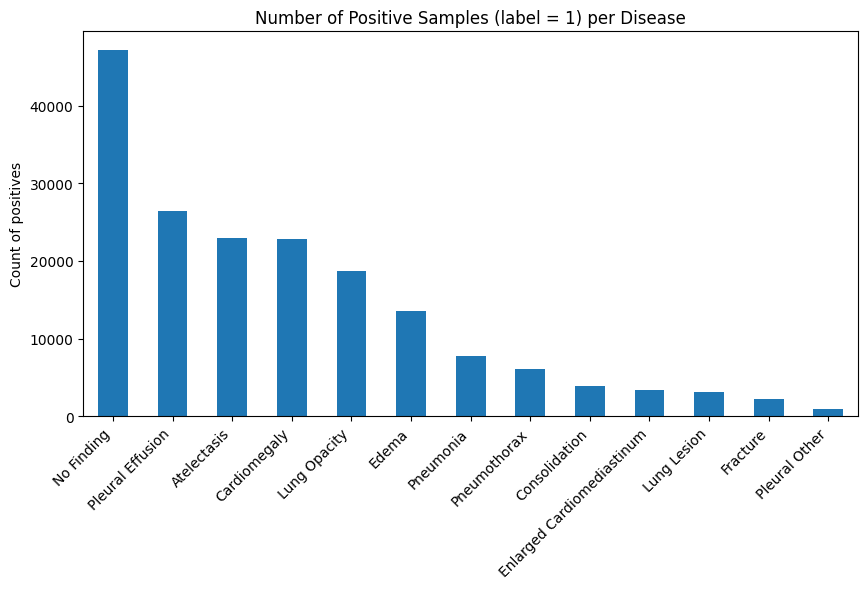

In [72]:
import matplotlib.pyplot as plt

# Count how many positives (value == 1) per label
positive_counts = (df_orig[disease_cols_chexpert] == 1).sum()

print("\nPositive counts per label:")
print(positive_counts)

# Plot bar chart
plt.figure(figsize=(10,5))
positive_counts.sort_values(ascending=False).plot(kind="bar")

plt.title("Number of Positive Samples (label = 1) per Disease")
plt.ylabel("Count of positives")
plt.xticks(rotation=45, ha="right")
plt.show()
